In [263]:
##############
#K. David Roell CFPB 7/12/16
#expands data selection for quality edits to include context for developing statistical approaches
#will attemtp to segment mortgage market participants by loan activity by:
#volume/count of lending, income of applicants, securitization, property type and other factors
##############
from collections import OrderedDict
import json
import os
import pandas as pd
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#get_ipython().magic(u'matplotlib inline')
matplotlib.style.use('ggplot')

In [264]:
#convert distribution to percent
dist_df = pd.read_csv('dist_csvs/amount_dist.csv')
dist_2014 = dist_df[dist_df.year == 2014].copy()
dist_2014.amount = dist_2014.amount.astype(int)

dist_2014['pct_count'] = round(dist_2014['count']/dist_2014['count'].sum(),4)
dist_2014['pct_amt'] = dist_2014['amount']/dist_2014['amount'].sum()
dist_2014['cumul_count_pct'] = 0
dist_2014['cumul_amt_pct'] = 0
#add cumulative percent by count and amount
cumul_count = 0
cumul_amount = 0
for index, row in dist_2014.iterrows():
    cumul_count += row['pct_count']
    cumul_amount += row['pct_amt']
    dist_2014.loc[index, 'cumul_count_pct']= cumul_count
    dist_2014.loc[index, 'cumul_amt_pct'] = cumul_amount


In [292]:
num_bins = 75
df_min = dist_2014.amount.min()
df_max = 550#dist_550#2014.amount.max()
df_range = df_max - df_min
bin_size = df_range / num_bins
bin_array = []
freq_data = OrderedDict()
bin_start = 0
bin_end = int(round(bin_size))
for bins in range(num_bins):
    #print(bin_start, bin_end)
    freq_data[str(bin_start) +' to '+ str(bin_end)] = dist_2014['count'][(dist_2014.amount > bin_start) & (dist_2014.amount < bin_end)].sum()
    #freq_data[str(bin_end)] = dist_2014['count'][(dist_2014.amount > bin_start) & (dist_2014.amount < bin_end)].sum()
    #print(dist_2014.amount[(dist_2014.amount < bin_start) & (dist_2014.amount > bin_end)].count())
    bin_array.append(bin_end)
    bin_start = int(round(bin_start + bin_size))
    bin_end = int(round(bin_end + bin_size))

freq_df = pd.Series(freq_data)#, index=range(len(freq_df.keys())))
#freq_df = freq_df.T
#freq_df.plot(kind='hist')
#dist_df['count'][dist_df.amount<100].sum()



[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175, 182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266, 273, 280, 287, 294, 301, 308, 315, 322, 329, 336, 343, 350, 357, 364, 371, 378, 385, 392, 399, 406, 413, 420, 427, 434, 441, 448, 455, 462, 469, 476, 483, 490, 497, 504, 511, 518, 525]
[  9689.   9124.  11238.  15156.  20543.  26067.  28122.  40632.  37953.
  37723.  42580.  43021.  48068.  43852.  63147.  44826.  45128.  59991.
  50190.  43494.  44362.  57070.  48702.  39109.  39181.  44797.  35655.
  38431.  49334.  34331.  32018.  32516.  34432.  27100.  29751.  32848.
  22424.  27373.  23658.  21560.  19381.  20376.  33401.  16419.  17158.
  18417.  16906.  16473.  16141.  13478.  14073.  14562.  12597.  12193.
  13900.  10438.   9178.  19344.  10877.  51407.   3536.   4691.   5781.
   3251.   6591.   5113.   4876.   5394.   5478.   4284.   5053.   8879.
   4167.   3562.   5310.] 75


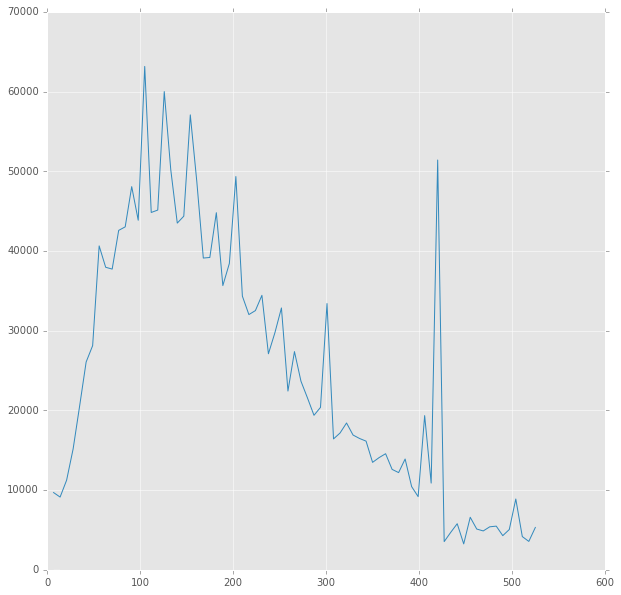

In [293]:
fig=plt.figure(figsize=(10,10))
n, bins, patches = plt.hist(freq_df, bins=bin_array)
y = freq_df.values

plt.plot(bins, y)
print(bin_array)
print(y, len(y))

['o 7', ' 14', ' 21', ' 28', ' 35', ' 42', ' 49', ' 56', ' 63', ' 70', ' 77', ' 84', ' 91', ' 98', '105', '112', '119', '126', '133', '140', '147', '154', '161', '168', '175', '182', '189', '196', '203', '210', '217', '224', '231', '238', '245', '252', '259', '266', '273', '280', '287', '294', '301', '308', '315', '322', '329', '336', '343', '350', '357', '364', '371', '378', '385', '392', '399', '406', '413', '420', '427', '434', '441', '448', '455', '462', '469', '476', '483', '490', '497', '504', '511', '518', '525']


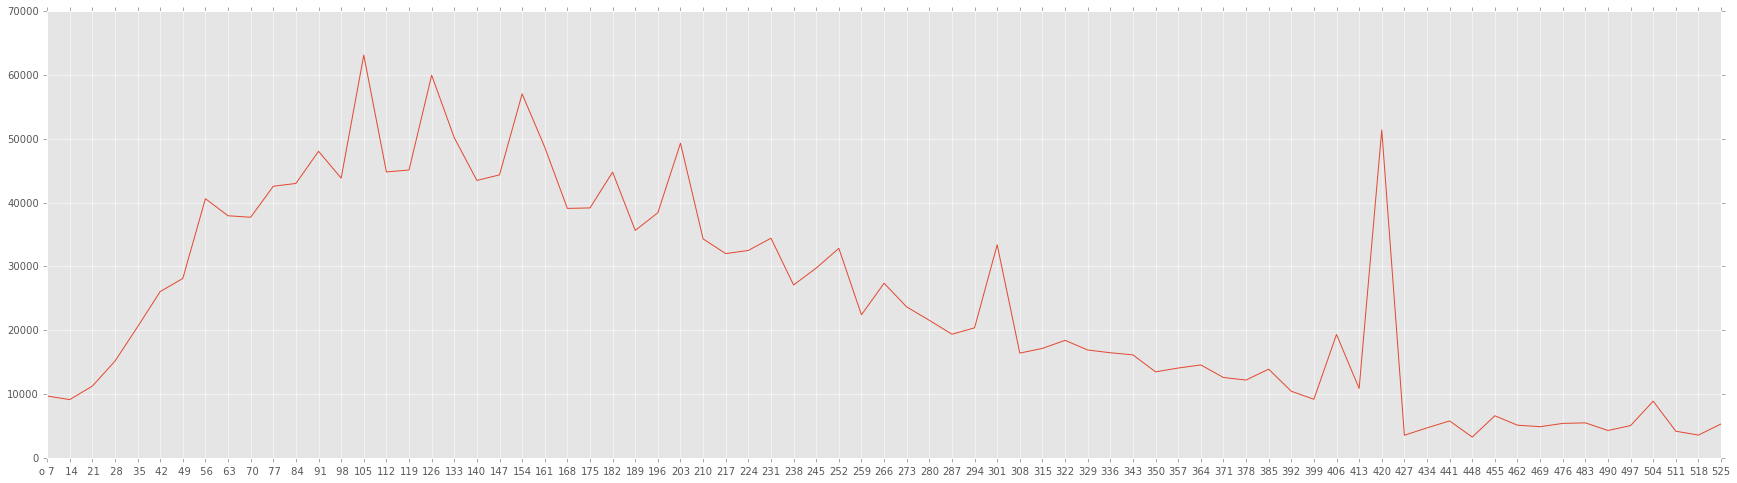

In [298]:
x_ticks = [tick[-3:] for tick in list(freq_data.keys())]
x = range(len(x_ticks))
print(x_ticks)
#x=#list(freq_data.keys())
y=list(freq_data.values())
test=plt.figure(figsize=(30,8))
#plt.xticks(range(len(freq_df.index)),x_ticks)
#plt.plot(freq_df.values)
#x_ticks=list(freq_df.index)
plt.xticks(x, x_ticks)
plt.plot(x,y)

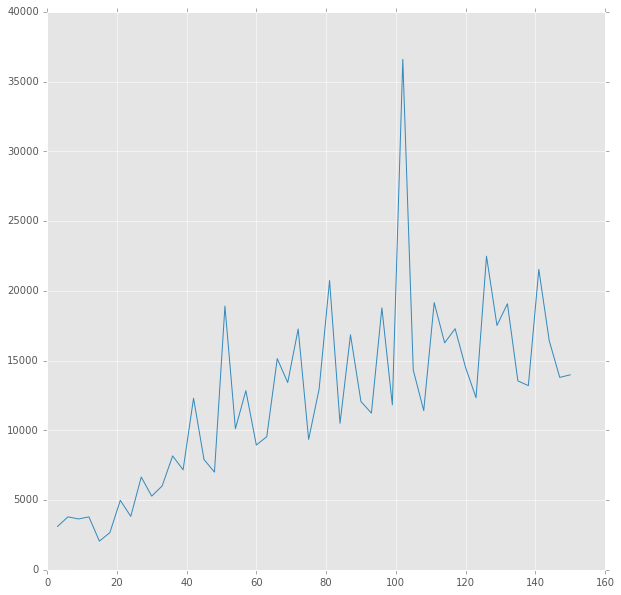

In [253]:
print(y)

[  3109.   3797.   3646.   3794.   2057.   2662.   4980.   3830.   6649.
   5280.   6013.   8164.   7167.  12297.   7904.   7004.  18900.  10113.
  12840.   8944.   9543.  15138.  13423.  17259.   9348.  12947.  20740.
  10500.  16846.  12062.  11234.  18776.  11825.  36591.  14318.  11413.
  19153.  16269.  17284.  14505.  12338.  22483.  17515.  19071.  13540.
  13202.  21529.  16408.  13793.  13976.]


In [254]:
print(len(y))

50
